<h1 style = "color : Sky blue"> Plotting Exercise(Numpy Attributes)</h1>

As you learnt in the session, data visualisation is an essential skill for a data scientist to have. Charts and graphs are the easiest way to communicate data to different kinds of consumers. The assessments in this notebook will test your ability to represent information. The questions will be investigative and will not have detailed instructions about the execution; you will have to figure that part out yourself. Don't worry, there are no wrong answers here, only happy accidents. Try these questions on your own, to verify if you have done the task correctly, look at the solution as a person who does not know the data and is looking at it for the first time. You will be able to identify better ways to represent data automatically.  

The dataset given for this notebook is the pricing data for diamonds based on the carat, cut, colour and so on. Take a look at the data below and also the data dictionary for a better understanding of the data and the attributes. 

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Read the data into a dataframe
data = pd.read_csv("diamonds.csv", header = 0)

# As a preparatory step, let's drop Unnamed column.
data = data.drop("Unnamed: 0", axis =1 )

data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [96]:
len(data) # 53940 wata data

53940

### Data Dictionary: 

1. **carat**: Weight of the diamond (0.2--5.01)

2.  **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color**: Diamond colour, from J (worst) to D (best)

4. **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. **table**: Width of top of diamond relative to widest point (43--95)

7. **price**: Price in US dollars (326 dollars -18,823 dollars)

8. **x**: Length in mm (0--10.74)

9. **y**: Width in mm (0--58.9)

10. **z**: Depth in mm (0--31.8)

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of prices of diamonds and note your observations. 

In [13]:
# df1 = data.groupby('carat')[['cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']].sum()
df2 = data.set_index('carat')
plt.bar(df2['clarity'],df2['color'], df2['price'])

# plt.bar(data['price'], data['carat'], data['clarity'], data['depth']

<BarContainer object of 53940 artists>

Error in callback <function flush_figures at 0x000002521314ED30> (for post_execute):


KeyboardInterrupt: 

In [25]:
len(data) # histogram banauda num of bins can be given square root of the length of data set

53940

Text(0.5, 0, 'Price')

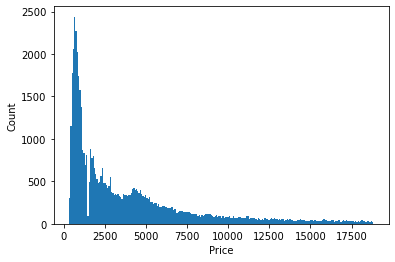

In [37]:
plt.hist(data['price'], bins=232)
plt.ylabel('Count')
plt.xlabel('Price')

In [ ]:
# yesma herda 0-2500 ko bich ma like 500 tira chai highest cha vannale tyo price range ma dherai data haru chan
# tespaxi 4800 tira dherai data haru chan

<h3 style = "color : Brown"> Question </h3>

Perform a similar variation analysis on the quality of cut. 

In [75]:
# data.groupby('cut').count()
df_count = data.groupby('cut')[['price']].count()
# sabse dherai given data points haru ideal ko chan 21hajar vanda badhi ra sabse thorai chai fair ko chhan 1600 vanda badhi 
df_count.reset_index(inplace = True)
df_count

,cut,price
0,Fair,1610
1,Good,4906
2,Ideal,21551
3,Premium,13791
4,Very Good,12082


In [ ]:
# Fair, Good, Very Good, Premium, Ideal
#  0      1      2          4        5  

# plt.bar(x_val, y_val)
# aba yo cut column lai order ma raakhera plot garera herda hun6
# ya order nagrikana nai garda ni hun6

In [51]:
cat = df_count['cut']
num = df_count['price']

In [53]:
type(cat)

pandas.core.series.Series

In [81]:
custom_order= ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [82]:
# Convert 'cut' column to categorical with the custom order
df_count['cut'] = pd.Categorical(df_count['cut'], categories=custom_order, ordered=True)
df_count


,cut,price
0,Fair,1610
1,Good,4906
2,Ideal,21551
3,Premium,13791
4,Very Good,12082


In [83]:
# Sort the DataFrame based on the custom order
df_count = df_count.sort_values('cut')
df_count

,cut,price
0,Fair,1610
1,Good,4906
4,Very Good,12082
3,Premium,13791
2,Ideal,21551


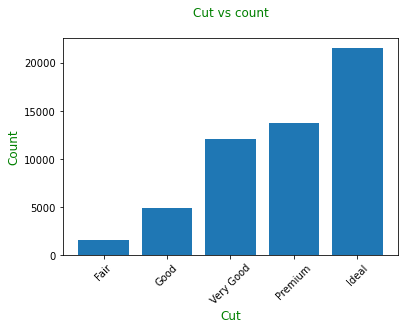

In [93]:
plt.bar(df_count['cut'], df_count['price']);

plt.title('Cut vs count\n', fontdict={'fontweight':5, 'color':'Green', 'fontsize':12})
plt.xlabel('Cut', fontdict={'fontweight':5, 'fontsize':12, 'color':'Green'})
plt.ylabel('Count', fontdict={'fontweight':5, 'fontsize':12, 'color':'Green'})

plt.xticks(['Fair','Good', 'Very Good', 'Premium', 'Ideal'], rotation = 45)

plt.show()

In [ ]:
# yo herda sabse dherai data ideal ko cha 20000 vanda badi wata chai ideal chan
# 5000 vanda kam chai Fair chan
# vanepaxi cut ko quality baddai jada number of data diamonds kepp on increasing 

<h3 style = "color : Brown"> Question </h3>

Represent the same information as above in a pie chart.

Text(0.5, 1.0, 'Distribution based on the quality of cut\n')

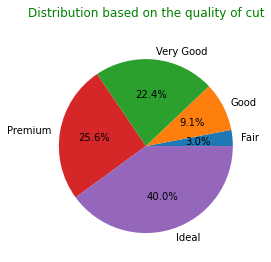

In [107]:
plt.pie(df_count['price'], labels=df_count['cut'], autopct='%1.1f%%');
plt.title('Distribution based on the quality of cut\n', fontdict={'fontweight':5, 'color':'Green', 'fontsize':12})


In [ ]:
# yesbata 40% data ta Ideal cut vakai chan
# 40% of the total diamods are Ideal

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of price of the diamonds, with respect to the carats. 

Text(0, 0.5, 'Price')

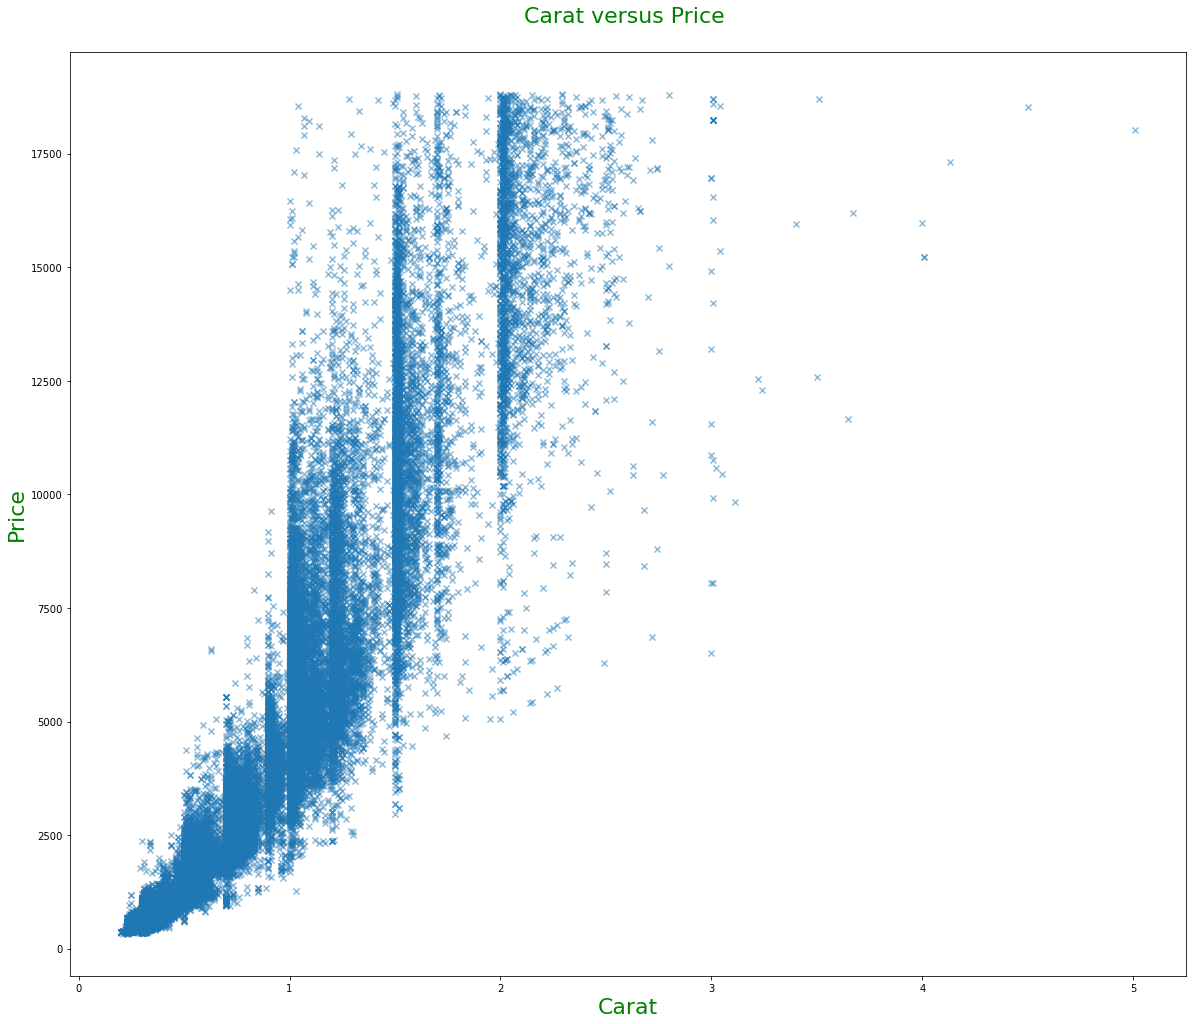

In [132]:
# carats ra price duwai numerical data hun

plt.figure(figsize = [20,17])
plt.scatter(x = data['carat'], y = data['price'], alpha = 0.5, marker = "x");

plt.title('Carat versus Price \n', fontdict={'fontweight':5, 'color':'Green', 'fontsize':22})
plt.xlabel('Carat', fontdict={'fontweight':5, 'fontsize':22, 'color':'Green'})
plt.ylabel('Price', fontdict={'fontweight':5, 'fontsize':22, 'color':'Green'})

In [ ]:
# yesbata eutai carat ko weight ma different prices cha
# ani jati carat ko weight increase vayo tetti price ni increase hun6

<h3 style = "color : Brown"> Question </h3>

Investigate the relationship of price with respect to the cut of the diamonds. 

In [ ]:
# price wrt to fair, good, very good, premium, ideal

In [146]:
# sabai fair, good, very good, premium, ideal sablai boxplot ma halne

data_fair = data[data['cut']=='Fair'] # fair matrai:
data_fair['price']

data_good = data[data['cut']=='Good']
data_good['price']

data_very_good = data[data['cut']=='Very Good']
data_very_good['price']

data_premium = data[data['cut']=='Premium']
data_premium['price']

data_ideal = data[data['cut']=='Fair']
data_ideal['price']

8         337
91       2757
97       2759
123      2762
124      2762
         ... 
53757    2724
53800    2732
53863    2743
53879    2745
53882    2747
Name: price, Length: 1610, dtype: int64

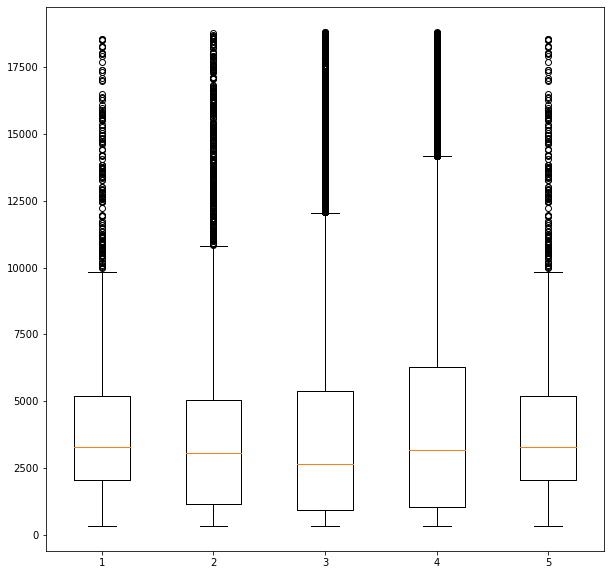

In [157]:
plt.figure(figsize = [10,10])
plt.boxplot([data_fair['price'], data_good['price'], data_very_good['price'], data_premium['price'], data_ideal['price']])
plt.show()

In [ ]:
# yesma outliers haru tannai chan sabaima
# yo sabai price ko plot garya honita sabai types of cutko
# ra yesma herda sabai ko median madhe sabse thorai median chai ideal cut ko ma cha

**All the best!**